In [74]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

In [75]:
(x_train,y_train) , (x_test,y_test) = keras.datasets.mnist.load_data()

In [78]:
len(x_train)

60000

In [99]:
len(x_test)
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [100]:
x_train = x_train/255
x_test = x_test/255

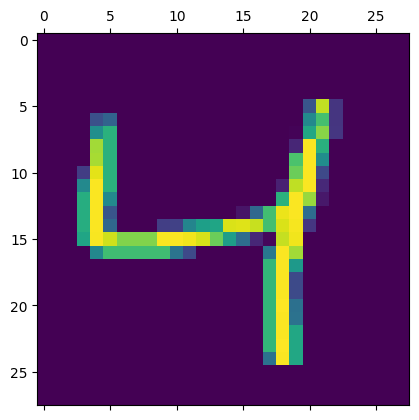

In [101]:
plt.matshow(x_train[2])

In [102]:
y_train[2]

4

In [103]:
x_train.shape


(60000, 28, 28)

In [104]:
new_x_train = x_train.reshape(len(x_train),28*28)
new_x_test = x_test.reshape(len(x_test),28*28)

In [105]:
new_x_train.shape

(60000, 784)

In [106]:
 model = keras.Sequential([
     keras.layers.Dense(10,input_shape = (784,),activation="sigmoid")
 ])
model.compile(optimizer= 'adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(new_x_train,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4695 - accuracy: 0.8784
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3038 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9258


In [107]:
model.evaluate(new_x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9258


[0.2676915228366852, 0.9258000254631042]

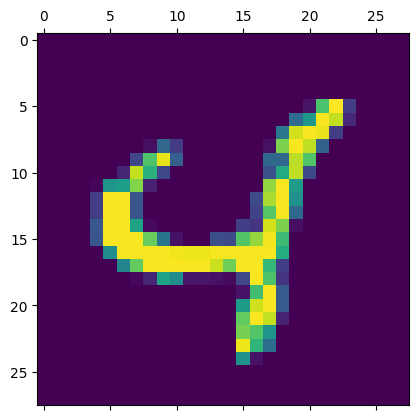

In [111]:
plt.matshow(x_test[67])

In [113]:
y_pred = model.predict(new_x_test)
y_pred[67]

313/313 [==============================] - 1s 2ms/step


array([2.6909828e-02, 3.7741574e-05, 1.4214206e-02, 1.7780939e-04,
       9.9779689e-01, 1.4903247e-03, 2.3051612e-01, 5.8179494e-02,
       1.4704140e-01, 4.3936220e-01], dtype=float32)

In [114]:
np.argmax(y_pred[67])

4

In [117]:
new_y_pred = [np.argmax(i) for i in y_pred]
conf_met = tf.math.confusion_matrix(labels = y_test, predictions = new_y_pred)

In [118]:
conf_met

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    2,    0,    5,    6,    2,    2,    0],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   6,    9,  922,   17,    9,    3,   13,    9,   41,    3],
       [   2,    0,   17,  923,    0,   24,    2,   11,   25,    6],
       [   1,    1,    5,    2,  922,    0,   11,    4,   11,   25],
       [   8,    2,    3,   33,   10,  782,   13,    5,   30,    6],
       [   9,    3,    3,    2,    7,   18,  911,    2,    3,    0],
       [   1,    5,   23,    8,    8,    0,    0,  955,    4,   24],
       [   6,    7,    7,   20,    9,   27,    8,   10,  875,    5],
       [  11,    7,    1,   11,   36,    9,    0,   30,    7,  897]])>

Text(0.5, 25.722222222222214, 'predict')

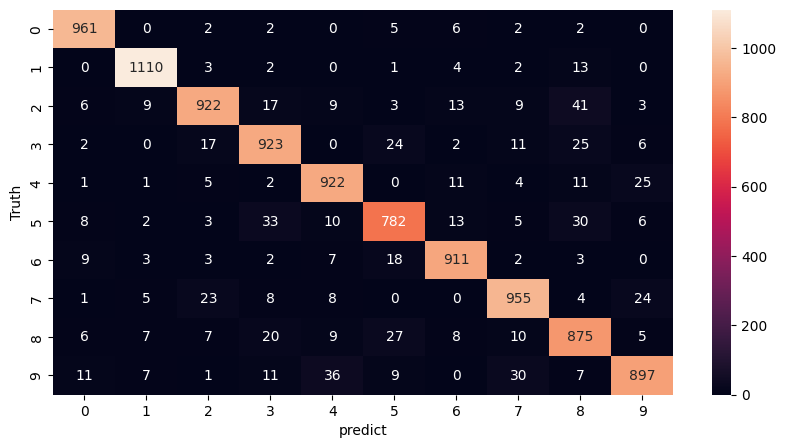

In [121]:
import seaborn as sn
plt.figure(figsize = (10,5))
sn.heatmap(conf_met,annot= True,fmt='d')
plt.ylabel('Truth')
plt.xlabel("predict")